### Importing libraries

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy import stats

### 1) Continuous Data
Detection and handling of outliers in numerical columns.

In [523]:
# Example continuous data
df_cont = pd.DataFrame({'Age': [23, 25, 26, 24, 120, 28, 22]})
# df_cont_2 = pd.DataFrame({'Age': [23, 35, 46, 60, 70, 50, 35, 24, 33, 38, 43, 62, 65, 63, 70, 69, 18, 25, 33, 25, 26, 24, 120, 80,  28, 22]})

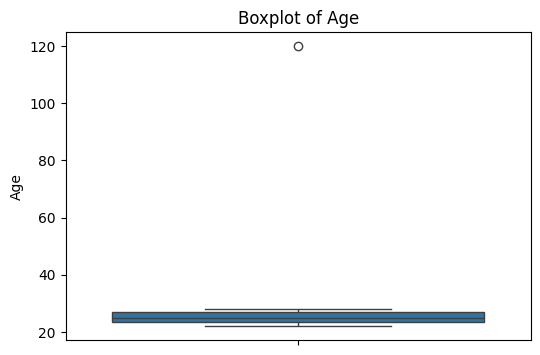

In [524]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df_cont['Age'])
plt.title("Boxplot of Age")
plt.show()

In [525]:
# IQR method for detecting outliers
Q1, Q3 = df_cont['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
print(f"Lower bound:{lower}")
print(f"Upper bound:{upper}")

Lower bound:18.25
Upper bound:32.25


In [526]:
# Flag outliers
df_cont['is_outlier'] = (df_cont['Age'] < lower) | (df_cont['Age'] > upper)
df_cont.query("is_outlier == True")

,Age,is_outlier
4,120,True


Capping / Winsorization

In [527]:
# Replace extreme values with the nearest threshold.

df = pd.DataFrame({'Age': [23, 25, 26, 24, 120, 28, 22]})

In [528]:
# Replace extreme values with the nearest threshold (winsorization).
Q1, Q3 = df['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

# Cap the values
df['Age_capped'] = df['Age'].clip(lower, upper)
df

,Age,Age_capped
0,23,23.00
1,25,25.00
2,26,26.00
3,24,24.00
4,120,32.25
5,28,28.00
6,22,22.00


z-score based outlier detection

In [529]:
df_z = pd.DataFrame({
    'Height': [160, 165, 170, 162, 158, 280, 168, 172, 159, 161, 145, 300, 155, 175,
               167, 169, 171, 166, 164, 173],
    'Weight': [55, 60, 65, 58, 57, 80, 63, 90, 54, 56, 40, 120, 42, 110,
               72, 75, 78, 80, 85, 88]
})
df_z

,Height,Weight
0,160,55
1,165,60
2,170,65
3,162,58
4,158,57
5,280,80
6,168,63
7,172,90
8,159,54
9,161,56


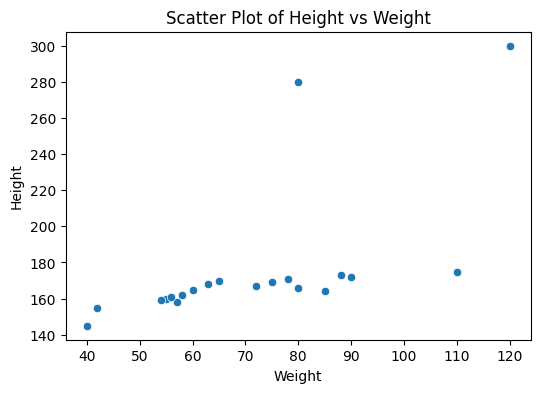

In [530]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_z, x='Weight', y='Height')
plt.title("Scatter Plot of Height vs Weight")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [531]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_z))
z_scores

array([[0.44256729, 0.81237907],
       [0.31240044, 0.56470253],
       [0.18223359, 0.31702598],
       [0.39050055, 0.66377315],
       [0.49463403, 0.71330845],
       [2.68143712, 0.42600366],
       [0.23430033, 0.4160966 ],
       [0.13016685, 0.92135675],
       [0.46860066, 0.86191438],
       [0.41653392, 0.76284376],
       [0.83306784, 1.55540871],
       [3.20210453, 2.40741603],
       [0.57273414, 1.45633809],
       [0.05206674, 1.91206294],
       [0.2603337 , 0.02972119],
       [0.20826696, 0.17832711],
       [0.15620022, 0.32693304],
       [0.28636707, 0.42600366],
       [0.33843381, 0.67368021],
       [0.10413348, 0.82228614]])

In [532]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_z))
z_scores

# Flag outliers (|Z| > 3)
outliers = (z_scores > 3)
df_z['Height_outlier_z'] = outliers[:, 0]
df_z['Weight_outlier_z'] = outliers[:, 1]

print("Data with Z-score outlier flags under |Z|>3:")
df_z.query('Height_outlier_z == True or Weight_outlier_z == True')

Data with Z-score outlier flags under |Z|>3:


,Height,Weight,Height_outlier_z,Weight_outlier_z
11,300,120,True,False


In [533]:
# Flag outliers (|Z| > 2)
outliers = (z_scores > 2)
df_z['Height_outlier_z'] = outliers[:, 0]
df_z['Weight_outlier_z'] = outliers[:, 1]

print("Data with Z-score outlier flags under |Z|>2:")
df_z.query('Height_outlier_z == True or Weight_outlier_z == True')

Data with Z-score outlier flags under |Z|>2:


,Height,Weight,Height_outlier_z,Weight_outlier_z
5,280,80,True,False
11,300,120,True,True


Model based outlier replacement

In [534]:
from sklearn.impute import KNNImputer
df_knn = pd.DataFrame({'Age': [23, 25, 26, 24, 120, 28, 22], 'Salary': [4000, 4200, 4100, 4300, 15000, 4400, 4000]})

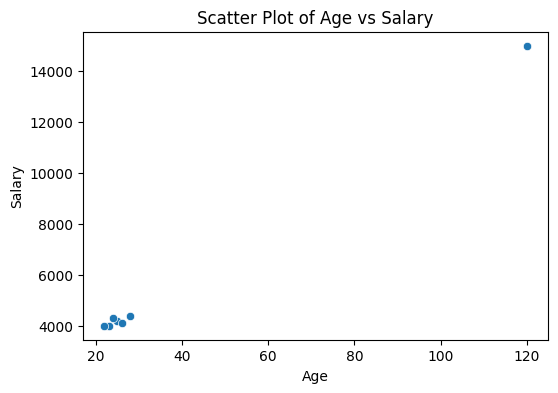

In [535]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_knn, x='Age', y='Salary')
plt.title("Scatter Plot of Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [536]:
# Imputing outliers using KNN
imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)
df_knn_imputed

,Age,Salary
0,23.0,4000.0
1,25.0,4200.0
2,26.0,4100.0
3,24.0,4300.0
4,120.0,15000.0
5,28.0,4400.0
6,22.0,4000.0


#### Using Isolation Forest to detect outliers in datasets with numeric variables.

In [537]:
from sklearn.ensemble import IsolationForest

# Example mixed-type dataset (numeric columns only for outlier detection)
df_mixed = pd.DataFrame({
    'Age': [25, 27, 26, 29, 90],
    'Income': [50000, 52000, 51000, 48000, 200000]
})

In [538]:
# Isolation Forest to detect outliers
iso = IsolationForest(contamination=0.2, random_state=42)
df_mixed['outlier_flag'] = iso.fit_predict(df_mixed)
df_mixed

,Age,Income,outlier_flag
0,25,50000,1
1,27,52000,1
2,26,51000,1
3,29,48000,1
4,90,200000,-1


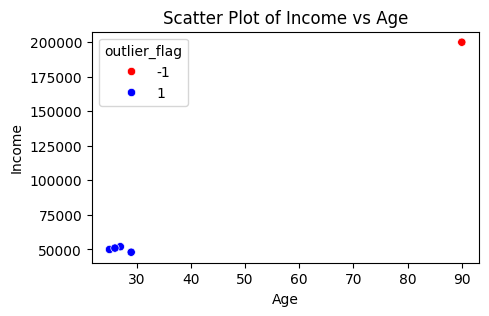

In [539]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df_mixed, x='Age', y='Income', hue='outlier_flag',
                palette={1:'blue', -1:'red'})
plt.title("Scatter Plot of Income vs Age")
plt.show()

In [540]:
# In IsolationForest: -1 indicates outlier, 1 indicates inlier
df_mixed

,Age,Income,outlier_flag
0,25,50000,1
1,27,52000,1
2,26,51000,1
3,29,48000,1
4,90,200000,-1


In [541]:
# Handling: replace outliers with NaN for later imputation
df_mixed_handled = df_mixed.copy()
df_mixed_handled.loc[df_mixed_handled['outlier_flag'] == -1, ['Age', 'Income']] = pd.NA
print("After replacing outliers with NaN:")
df_mixed_handled


After replacing outliers with NaN:


,Age,Income,outlier_flag
0,25.0,50000.0,1
1,27.0,52000.0,1
2,26.0,51000.0,1
3,29.0,48000.0,1
4,NaN,NaN,-1


In [542]:
df_mixed = pd.DataFrame({
    'Age': [25, 27, 26, 29, 90],
    'Income': [50000, 52000, 51000, 48000, 200000]
})

In [543]:
from sklearn.ensemble import IsolationForest

# Isolation Forest to detect outliers
iso = IsolationForest(contamination=0.2, random_state=42)
df_mixed['outlier_flag'] = iso.fit_predict(df_mixed)
df_mixed

,Age,Income,outlier_flag
0,25,50000,1
1,27,52000,1
2,26,51000,1
3,29,48000,1
4,90,200000,-1


### 2) Categorical Data
Detection of rare categories and handling.

In [544]:
# Example categorical data
df_cat = pd.DataFrame({'City': ['Colombo', 'Kandy', 'Galle', 'Colombo', 'Paris']})

In [545]:
# Create a skewed categorical dataset
cities = ['Colombo', 'Kandy', 'Galle', 'Paris']
weights = [0.5, 0.3, 0.19, 0.01]  # Probabilities summing to 1

np.random.seed(42)  # for reproducibility
df_cat = pd.DataFrame({
    'City': np.random.choice(cities, size=1000, p=weights)
})

# Introduce one typo for outlier handling
df_cat.loc[df_cat.sample(1).index, 'City'] = 'Kolombo'
df_cat['City'].value_counts(normalize=True)  # Shows distribution in %


City
Colombo    0.502
Kandy      0.298
Galle      0.193
Paris      0.006
Kolombo    0.001
Name: proportion, dtype: float64

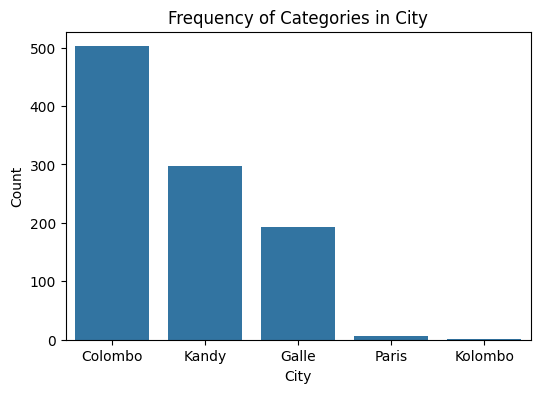

In [546]:
freq = df_cat['City'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=freq.index, y=freq.values)
plt.title("Frequency of Categories in City")
plt.ylabel("Count")
plt.show()

Cleaning misspellings

In [547]:
# Correct the typo for Colombo
df_cat['City'] = df_cat['City'].replace('Kolombo', 'Colombo')

# Check the updated value counts
df_cat['City'].value_counts(normalize=True)

City
Colombo    0.503
Kandy      0.298
Galle      0.193
Paris      0.006
Name: proportion, dtype: float64

Detection

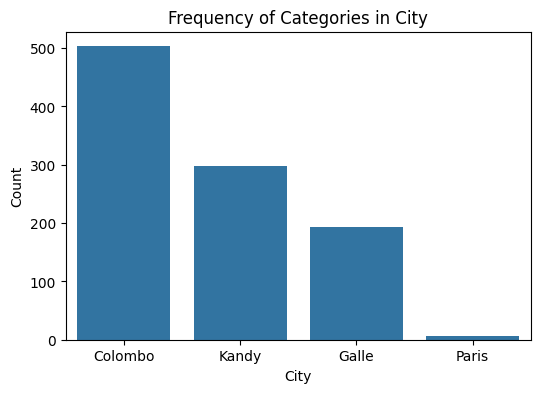

In [548]:
freq = df_cat['City'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=freq.index, y=freq.values)
plt.title("Frequency of Categories in City")
plt.ylabel("Count")
plt.show()

In [549]:
# Detect rare categories (less than 10% frequency)
freq = df_cat['City'].value_counts(normalize=True)
rare_labels = freq[freq < 0.1].index
rare_labels

Index(['Paris'], dtype='object', name='City')

In [550]:
# Replace rare categories with 'Other'
df_cat['City_cleaned'] = df_cat['City'].replace(rare_labels, 'Other')
df_cat

,City,City_cleaned
0,Colombo,Colombo
1,Galle,Galle
2,Kandy,Kandy
3,Kandy,Kandy
4,Colombo,Colombo
...,...,...
995,Colombo,Colombo
996,Galle,Galle
997,Colombo,Colombo
998,Galle,Galle


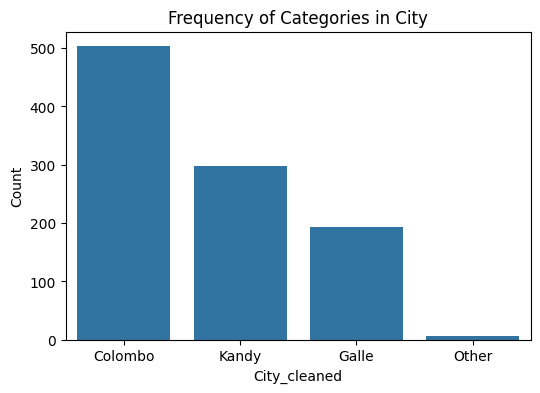

In [551]:
freq = df_cat['City_cleaned'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=freq.index, y=freq.values)
plt.title("Frequency of Categories in City")
plt.ylabel("Count")
plt.show()

In [552]:
df_cat[df_cat['City_cleaned'] == "Other"]

,City,City_cleaned
261,Paris,Other
390,Paris,Other
475,Paris,Other
531,Paris,Other
532,Paris,Other
847,Paris,Other


In [553]:
print(f"Before: {len(df_cat)}")

# removing those in the other category
df_cat = df_cat[df_cat['City_cleaned'] != "Other"]

print(f"After: {len(df_cat)}")

Before: 1000
After: 994


In [554]:
df_cat

,City,City_cleaned
0,Colombo,Colombo
1,Galle,Galle
2,Kandy,Kandy
3,Kandy,Kandy
4,Colombo,Colombo
...,...,...
995,Colombo,Colombo
996,Galle,Galle
997,Colombo,Colombo
998,Galle,Galle
